# Data Science Toolbox Use-Case Project Covid-19

#### Group members
| Name | MatNr. | E-Mail |
|---|---|---|
|Tazio Faha         |396024|t.faha@campus.tu-berlin.de      |
|Jannis Kiesel      |459410|j.kiesel@campus.tu-berlin.de    |
|Yevheniia Vostres  |467678|y.vostres@campus.tu-berlin.de   |
|Ahmed Hussein      |401119|a.hussein@campus.tu-berlin.de   |
|Maarten Dohrwardt  |475540|m.dohrwardt@campus.tu-berlin.de |


### Guiding Questions and Topics
- Can you find any correlation between the government measures and COVID-19 cases and fatalities? 
    - Explore the already taken EU-wide government measures in the past and its correlation with COVID-19 cases and fatalities
- The following countries should be taken into account: 
    - Austria, Belgium, Denmark, France, Italy, Netherlands, Poland, Spain and Sweden
- What could be a valuable timeframe within the measures to see first results in the correlation?
- Do you find any correlation within measures “ClosPrim”, “ClosPubAny”, “IndoorOver500”, 
    - which were used several times, 
    - in the different countries?
- Does this correlation indicate causation and why?
- Can you find any trend in different demographics within the population (e.g. male/female) ?
- Think beyond what else could be analyzed from the data?

### Install Guide
Please have a look through our [README.md](./README.md)

Download the source files and add them in your repository.


### Data Sources
- [This source describes the eu goernmental measures](https://www.ecdc.europa.eu/en/publications-data/download-data-response-measures-covid-19)
    - [This is the actual measures dataset](https://www.ecdc.europa.eu/sites/default/files/documents/response_graphs_data_2022-05-05.csv)
    - [This is the Variable description on the different measures](https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_and_Disclaimer_non-pharmacautical_measures_v3.pdf)
- [This source describes the covid cases on a per day and country basis](https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country)
    - [This source is the actual covid case dataset for the european union](https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv)





In [3]:
import pandas as pd
measures_df = pd.read_csv("response_graphs_data_2022-05-05.csv",sep=",",parse_dates=[2,3])
measures_df

,Country,Response_measure,date_start,date_end
0,Austria,AdaptationOfWorkplace,2020-03-16,2020-04-13
1,Austria,AdaptationOfWorkplace,2021-04-01,NaT
2,Austria,BanOnAllEvents,2020-11-03,2021-05-18
3,Austria,ClosDaycare,2020-03-16,2020-05-04
4,Austria,ClosDaycare,2020-11-17,2020-12-07
...,...,...,...,...
2053,Sweden,QuarantineForInternationalTravellers,2021-01-22,2022-03-31
2054,Sweden,RestaurantsCafesPartial,2020-07-01,2021-09-28
2055,Sweden,RestaurantsCafesPartial,2022-01-12,2022-02-09
2056,Sweden,StayHomeRiskG,2020-04-01,2020-10-22


In [58]:
cases_and_deaths_df = pd.read_csv("data.csv",sep=",",parse_dates=["dateRep"],dayfirst=True)[["dateRep","countriesAndTerritories","cases","deaths"]]
#cases_df = cases_df.set_index(["dateRep","countriesAndTerritories"])
cases_df = cases_and_deaths_df[["dateRep","countriesAndTerritories","cases"]].pivot(index="dateRep",columns="countriesAndTerritories")["cases"].reset_index()
deaths_df = cases_and_deaths_df[["dateRep","countriesAndTerritories","deaths"]].pivot(index="dateRep",columns="countriesAndTerritories")["deaths"].reset_index()
cases_df.columns.name = None
deaths_df.columns.name = None
cases_df.set_index("dateRep", inplace=True)
deaths_df.set_index("dateRep",inplace=True)

<AxesSubplot:xlabel='dateRep'>

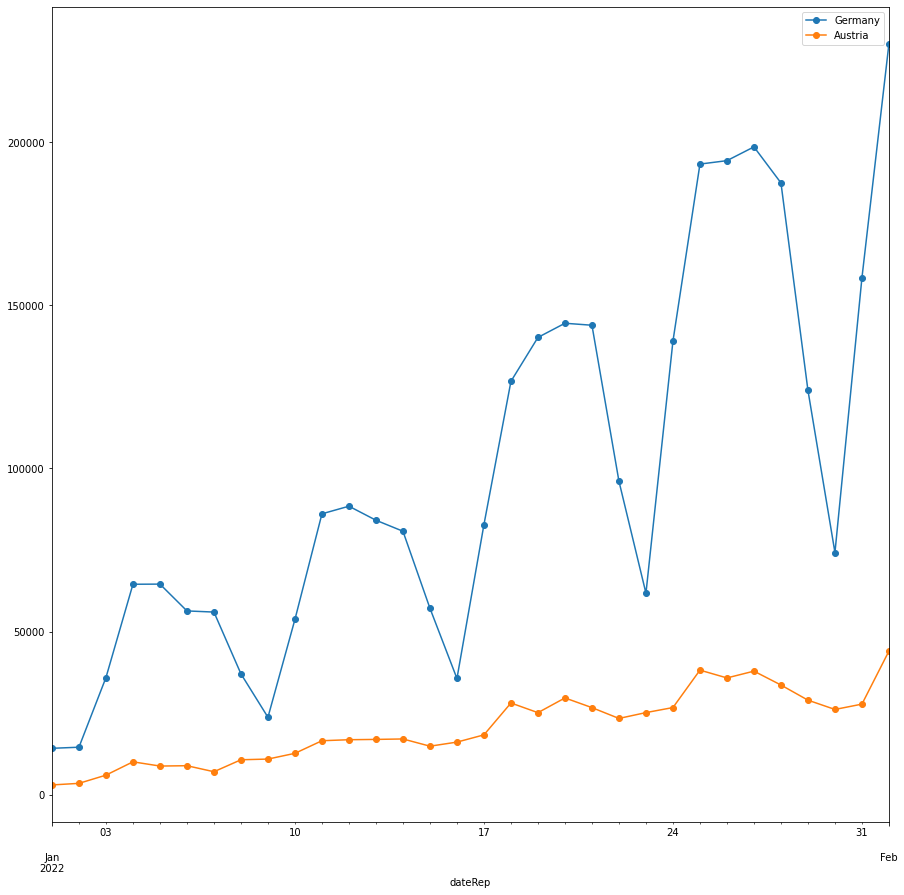

In [71]:
cases_df[["Germany","Austria"]]["2022-01-01":"2022-02-01"].plot(figsize=(15,15),style="-o")

<AxesSubplot:xlabel='dateRep'>

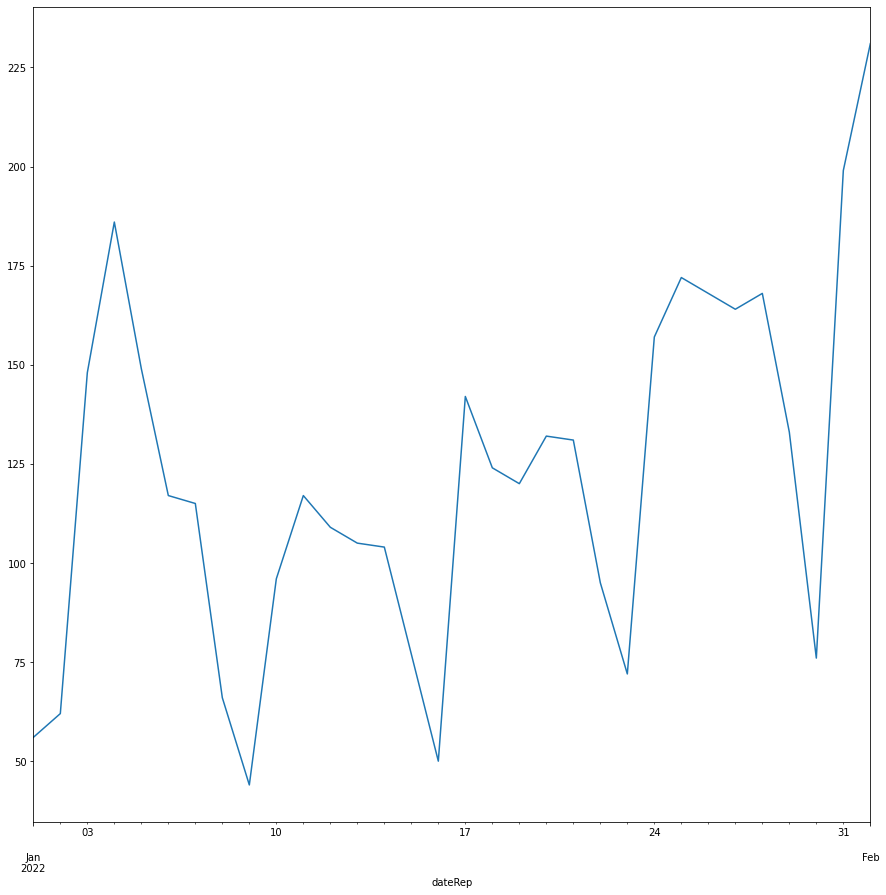

In [68]:
deaths_df["Germany"]["2022-01-01":"2022-02-01"].plot(figsize=(15,15))